# Introduction

This project analyzes the differences between calisthenics and weight training, specifically focusing on how quickly individuals progress in difficulty levels. Understanding progression rates can help athletes and fitness enthusiasts choose the best training method based on their goals.


# 1. Import Libraries

The necessary libraries for data handling and visualization are imported:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 2. Load the Dataset

The dataset containing exercise details is loaded:

In [2]:
file_path = "C:/Users/georg/Desktop/megaGymDataset.csv"
df = pd.read_csv(file_path)


# 3. Data Overview

A quick look at the dataset structure:

In [3]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB
None
   Unnamed: 0                         Title  \
0           0        Partner plank band row   
1           1  Banded crunch isometric hold   
2           2         FYR Banded Plank Jack   
3           3                 Banded crunch   
4           4                        Crunch   

                                                Desc      Type    BodyPart  \
0  The partne

## We remove unnecessary columns:

In [4]:
df = df.drop(columns=["Unnamed: 0"])


# 4. Filter Data for Calisthenics & Weight Training

Exercises are categorized based on the equipment used:

In [5]:
calisthenics_df = df[df['Equipment'] == 'Body Only']
weights_df = df[df['Equipment'] != 'Body Only']


Display the number of exercises in each category.

In [6]:
print(f"Calisthenics Exercises: {len(calisthenics_df)}")
print(f"Weight Training Exercises: {len(weights_df)}")


Calisthenics Exercises: 1078
Weight Training Exercises: 1840


# 5. Analyze Difficulty Levels

The distribution of difficulty levels for both exercise types is examined:

In [7]:
calisthenics_levels = calisthenics_df['Level'].value_counts()
weight_training_levels = weights_df['Level'].value_counts()

print(calisthenics_levels)

print(weight_training_levels)

Intermediate    993
Beginner         82
Expert            3
Name: Level, dtype: int64
Intermediate    1453
Beginner         377
Expert            10
Name: Level, dtype: int64


# 6. Calculate Progression Ratios

Progression ratios indicate how many individuals advance between difficulty levels:

In [8]:
calisthenics_progression = {"Beginner to Intermediate": 9.35, "Intermediate to Expert": 0.003}
weight_training_progression = {"Beginner to Intermediate": 4.58, "Intermediate to Expert": 0.0069}

# Round values for better interpretation
calisthenics_progression_rounded = {key: math.ceil(value) for key, value in calisthenics_progression.items()}
weight_training_progression_rounded = {key: math.ceil(value) for key, value in weight_training_progression.items()}

print(calisthenics_progression_rounded)
print(weight_training_progression_rounded)

{'Beginner to Intermediate': 10, 'Intermediate to Expert': 1}
{'Beginner to Intermediate': 5, 'Intermediate to Expert': 1}


# 7. Visualize Difficulty Level Distribution

Bar plots are used to compare progression rates:

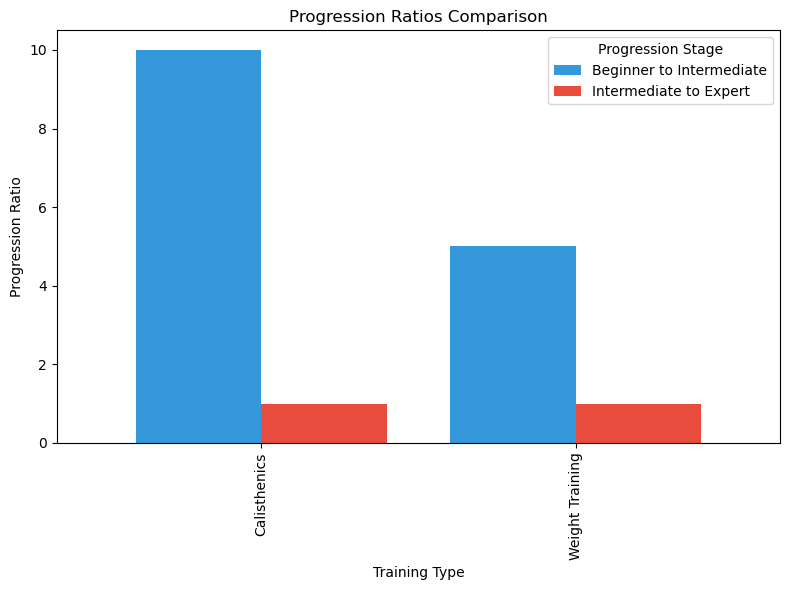

In [9]:
progression_df = pd.DataFrame({
    "Training Type": ["Calisthenics", "Weight Training"],
    "Beginner to Intermediate": [calisthenics_progression_rounded["Beginner to Intermediate"],
                                   weight_training_progression_rounded["Beginner to Intermediate"]],
    "Intermediate to Expert": [calisthenics_progression_rounded["Intermediate to Expert"],
                                weight_training_progression_rounded["Intermediate to Expert"]]
})

ax = progression_df.set_index('Training Type').plot(kind='bar', figsize=(8, 6),
                                                    color=['#3498db', '#e74c3c'], width=0.8, stacked=False)
plt.title('Progression Ratios Comparison')
plt.ylabel('Progression Ratio')
plt.xlabel('Training Type')
plt.legend(title='Progression Stage')
plt.tight_layout()
plt.show()

# 8. Visualize Difficulty Level Distribution

Comparing difficulty levels using bar plots:

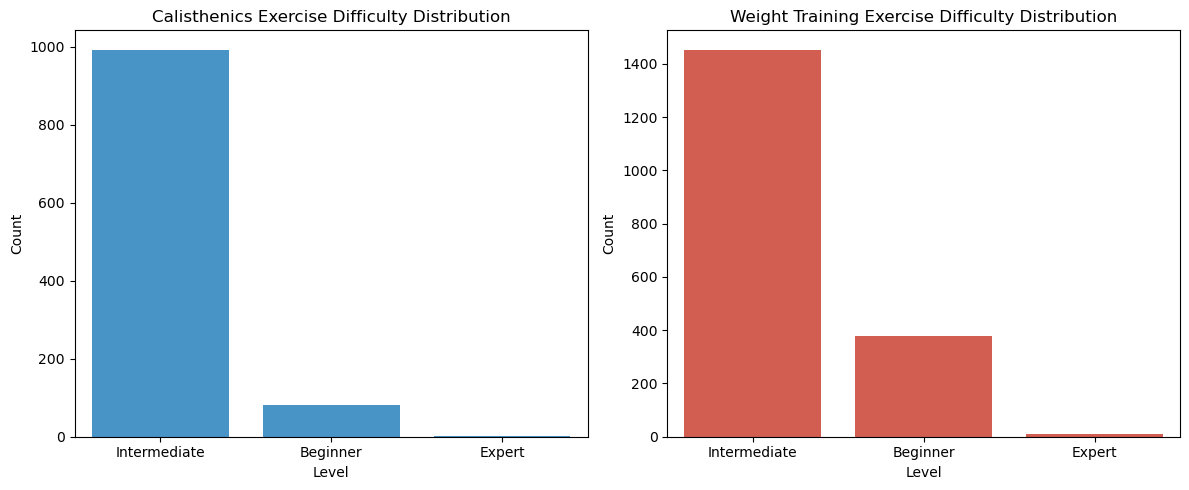

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x="Level", y="Count", data=calisthenics_levels.reset_index().rename(columns={"index": "Level", "Level": "Count"}),
            ax=axes[0], color="#3498db")
axes[0].set_title("Calisthenics Exercise Difficulty Distribution")

sns.barplot(x="Level", y="Count", data=weight_training_levels.reset_index().rename(columns={"index": "Level", "Level": "Count"}),
            ax=axes[1], color="#e74c3c")
axes[1].set_title("Weight Training Exercise Difficulty Distribution")

plt.tight_layout()
plt.show()

# 9. Conclusion

Calisthenics has a significantly higher Beginner-to-Intermediate progression ratio (9.35) compared to weight training (4.58).

Progressing to an expert level is challenging in both training methods, with calisthenics at 0.003 and weight training at 0.0069.

Beginners may find it easier to advance in calisthenics, but weight training provides a more gradual progression curve.

#### Key Takeaway:

If you want rapid early progression, calisthenics may be the best choice.

If you prefer structured and gradual difficulty increases, weight training is more suitable.


